In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sets = ['set_ACC', 'set_BLCA', 'set_BRCA', 'set_CESC', 'set_CHOL', 'set_COAD', 'set_ESCA', 'set_GBM', 'set_HNSC', 
        'set_KIRC', 'set_KIRP', 'set_LGG', 'set_LIHC', 'set_LUAD', 'set_LUSC', 'set_MESO', 'set_PCPG', 'set_PRAD', 
        'set_SKCM', 'set_STAD', 'set_TGCT', 'set_THCA', 'set_UCEC']

#BLCA data is missing, because of errors in FIMO
AR_motif_data = [r'ARdata\ACCfimo.tsv', r'ARdata\BRCAfimo.tsv', r'ARdata\CESCfimo.tsv',
                 r'ARdata\CHOLfimo.tsv', r'ARdata\COADfimo.tsv', r'ARdata\ESCAfimo.tsv', r'ARdata\GBMfimo.tsv',
                 r'ARdata\HNSCfimo.tsv', r'ARdata\KIRCfimo.tsv', r'ARdata\KIRPfimo.tsv', r'ARdata\LGGfimo.tsv',
                 r'ARdata\LIHCfimo.tsv', r'ARdata\LUADfimo.tsv', r'ARdata\LUSCfimo.tsv', r'ARdata\MESOfimo.tsv',
                 r'ARdata\PCPGfimo.tsv', r'ARdata\PRADfimo.tsv', r'ARdata\SKCMfimo.tsv', r'ARdata\STADfimo.tsv',
                 r'ARdata\TGCTfimo.tsv', r'ARdata\THCAfimo.tsv', r'ARdata\UCECfimo.tsv']

#Bed peak files downloaded from Cistrome to do a validation with
#C4-2 means prostate cancer, prostate is healthy
#C4-2 prostate is the positive control and melanoma_skin is the negative control (based on protein atlas and research)
Cistrome_data = [r'CistromeData\breast1.txt', r'CistromeData\breast2.txt', r'CistromeData\C4-2 prostate1.txt',
                r'CistromeData\C4-2 prostate2.txt', r'CistromeData\C4-2 prostate3.txt', r'CistromeData\colon.txt',
                r'CistromeData\melanoma_skin.txt', r'CistromeData\kidney.txt', r'CistromeData\prostate.txt',
                r'CistromeData\MCF-7 breast.txt']

groups = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12',
          'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX',
          'chrY']

# Preprocessing datasets

In [2]:
def open_tsv_files(AR_motif_data=''):
    df = pd.read_csv(AR_motif_data, sep='\t')
    df = df.drop([df.shape[0]-1, df.shape[0]-2, df.shape[0]-3]) #remove three empty rows at the end of every tsv file
    df = df.rename(columns={'sequence_name': 'seqnames', 'stop': 'end'}) #rename columns, so they match the other dataframes
    
    return df


In [3]:
def cistrome_data_preprocessing(set_1=''):
    f = open(set_1)
    dataset = f.read()
    f.close()
    
    records=dataset.split('\n')
    records=records[:len(records)-1] #I removed the first five text lines in the file itself
                                     #If you don't the fill in records[5:len(records)]
    for i in range(len(records)):
        records[i]=records[i].split()
      
    df=pd.DataFrame(records[1:],columns=records[0])          
    
    cols = df.columns[df.dtypes.eq('object')] 
    df[cols] = df[cols].apply(pd.to_numeric, errors='ignore') #change columns with dtype 'object' to integers
    
    return df


In [4]:
def sortvalues(value,df,groups):
    series=df.groupby(by='seqnames',sort='False').get_group(groups[0]).sort_values(by='start')
    for group in groups:
        if group != groups[0]:
            if group in df['seqnames'].values:
                series=series.append(df.groupby(by='seqnames',sort='False').get_group(group).sort_values(by='start'),ignore_index=True)
        
    return series

### Making lists with the preprocessed datasets

In [5]:
#create a list with all the dataframes of the different cancer types
sets_AR=[]
sets_Cistrome=[]

for data in AR_motif_data:
    df = open_tsv_files(data)
    df.reset_index(inplace=True) #reset index
    #df.sort_values(by='seqnames', inplace=True) #sort the dataframe on seqnames
    sets_AR.append(df)
    
for data in Cistrome_data:
    df = cistrome_data_preprocessing(data)
    df.reset_index(inplace=True)
    #df.sort_values(by='seqnames', inplace=True)
    sets_Cistrome.append(df)
    
#sets_Cistrome
#sets_AR[0]

In [6]:
checkstart=sets_Cistrome[0].groupby('seqnames',sort=False)

In [7]:
groups_wrong = [name for name,unused_df in checkstart]
wrong=[]
for group in groups_wrong:
    if group not in groups:
        wrong.append(group)

In [8]:
wrong

['chrGL000008.2',
 'chrGL000194.1',
 'chrGL000195.1',
 'chrGL000205.2',
 'chrGL000216.2',
 'chrGL000218.1',
 'chrGL000219.1',
 'chrGL000220.1',
 'chrGL000224.1',
 'chrGL000225.1',
 'chrKI270438.1',
 'chrKI270442.1',
 'chrKI270466.1',
 'chrKI270467.1',
 'chrKI270708.1',
 'chrKI270711.1',
 'chrKI270712.1',
 'chrKI270713.1',
 'chrKI270714.1',
 'chrKI270723.1',
 'chrKI270725.1',
 'chrKI270726.1',
 'chrKI270728.1',
 'chrKI270729.1',
 'chrKI270731.1',
 'chrKI270733.1',
 'chrKI270734.1',
 'chrKI270742.1',
 'chrKI270744.1',
 'chrKI270747.1',
 'chrMT']

In [9]:
for l in range(len(sets_Cistrome)):
    sets_Cistrome[l]=sets_Cistrome[l][~sets_Cistrome[l]['seqnames'].isin(wrong)]
checkstart2=sets_Cistrome[0].groupby('seqnames',sort=False)
groups=[name for name,unused_df in checkstart2]

In [10]:
for l in range(len(sets_Cistrome)):
    sets_Cistrome[l]=sortvalues('seqnames',sets_Cistrome[l],groups)
#sets_Cistrome[0]

# Comparing overlap

In [11]:
#Function to compare peak intervals
def Compare(set_1, set_2):    
    #reset all the variables
    index1 = 0 #interval number of list 1
    index2 = 0 #interval number of list 2
    total_overlap_12 = [0 for i in range(set_1.shape[0])]
    count = 0
    
    #loop over the list till it has come to an end, since list lengths can vary
    while not index1 == set_1.shape[0]:
        start1 = set_1['start'].loc[index1]
        end1 = set_1['end'].loc[index1]
        start2 = set_2['start'].loc[index2]
        end2 = set_2['end'].loc[index2]
        overlap = False
        
        #compute current intervals
        #check for overlap between the intervals
        if start1<=end2 and end1>=start2:
            overlap=True
            count+=1

        #if OVERLAP FALSE        
        if overlap == False:
            #go to next interval2 if the end of interval 2 is before the beginnning of interval 1 
            if end2 < start1:
                #check if list2 has come to end: If true add to index1 instead of index2
                if index2 == set_2.shape[0]-1:
                    index1 += 1
                else:
                    index2 += 1
            #go to next interval1 if interval2 begins after interval1 ends
            elif end1 < start2:
                index1 += 1
                
        #if OVERLAP TRUE 
        if overlap == True and index1 <= set_1.shape[0]-1:
            total_overlap_12[index1] = 1
            index1 += 1
   
    return total_overlap_12

In [12]:
#checking if the overlap function works using breast datasets from AR and breast dataset 1 from Cistrome
overlap_BRCA = Compare(sets_AR[1].groupby('seqnames',sort=False).get_group('chr1').sort_values(by='start').reset_index(),
                       sets_Cistrome[0].groupby('seqnames',sort=False).get_group('chr1').sort_values(by='start').reset_index())
#overlap_BRCA

### Calculating similarity in percentages

In [13]:
#Calculate the percentages overlap between two dataframes by using the compare function
def percentage(df_1, df_2, name1, name2):
    overlap_12=[]
    overlap_21=[]
    
    for group in groups:
        if group in df_1['seqnames'].values and group in df_2['seqnames'].values:
            set_1 = df_1.groupby('seqnames',sort=False).get_group(group).sort_values(by='start').reset_index()
            set_2 = df_2.groupby('seqnames',sort=False).get_group(group).sort_values(by='start').reset_index()
            overlap_12.extend(Compare(set_1,set_2))
            overlap_21.extend(Compare(set_2,set_1))
        elif group in df_1['seqnames'].values:
            overlap_12.extend([0 for i in range(df_1.groupby('seqnames',sort=False).get_group(group).shape[0])])
        else:
            overlap_21.extend([0 for i in range(df_2.groupby('seqnames',sort=False).get_group(group).shape[0])])

    df_1[name2] = overlap_12
    df_2[name1] = overlap_21

    perc_1op2 = (df_1[name2].sum()/df_1.shape[0])*100
    perc_2op1 = (df_2[name1].sum()/df_2.shape[0])*100
    
    print('percentage overlap of', name1, 'on', name2,':', perc_1op2, 'percentage overlap of ', 
          name2, 'on', name1, ':', perc_2op1)
    avg_perc_12 = (perc_1op2+perc_2op1)/2

    return df_1, df_2, avg_perc_12

# Validating AR motif search datasets

In [14]:
#Using the percentage function to calculate the similarity between datasets from cistrome (with highest quality control) 
#and our own AR motif search datasets (that were obtained from FIMO)
#This way we validate if our own AR motifs are accurate

### Positive control

In [27]:
#Comparing three C4-2 prostate datasets (with quality of 4 or 5) from Cistrome with our dataset from FIMO
df_AR, df_Cistrome, avg_perc_PRAD1 = percentage(sets_AR[16], sets_Cistrome[2], 'AR_PRAD1', 'Cistrome_PRAD1');
df_AR, df_Cistrome, avg_perc_PRAD2 = percentage(sets_AR[16], sets_Cistrome[3], 'AR_PRAD2', 'Cistrome_PRAD2');
df_AR, df_Cistrome, avg_perc_PRAD3 = percentage(sets_AR[16], sets_Cistrome[4], 'AR_PRAD3', 'Cistrome_PRAD3');

print(avg_perc_PRAD1) #Result is approximately 13,7% overlap
print(avg_perc_PRAD2) #Result is approximately 23,9% overlap
print(avg_perc_PRAD3) #Result is approximately 27,6% overlap

percentage overlap of AR_PRAD1 on Cistrome_PRAD1 : 16.75365344467641 percentage overlap of  Cistrome_PRAD1 on AR_PRAD1 : 10.745873859972997
percentage overlap of AR_PRAD2 on Cistrome_PRAD2 : 35.62282533054976 percentage overlap of  Cistrome_PRAD2 on AR_PRAD2 : 12.133891213389122
percentage overlap of AR_PRAD3 on Cistrome_PRAD3 : 43.785664578984 percentage overlap of  Cistrome_PRAD3 on AR_PRAD3 : 11.395854088895824
13.749763652324702
23.87835827196944
27.59075933393991


In [28]:
#Comparing a prostate datasets (with quality of 5) from Cistrome with our dataset from FIMO
df_AR, df_Cistrome, avg_perc_PRADnorm = percentage(sets_AR[16], sets_Cistrome[8], 'AR_PRADnorm', 'Cistrome_PRADnorm');

print(avg_perc_PRADnorm) #Result is approximately 21,8% overlap

percentage overlap of AR_PRADnorm on Cistrome_PRADnorm : 22.65135699373695 percentage overlap of  Cistrome_PRADnorm on AR_PRADnorm : 20.91877892412856
21.785067958932757


In [67]:
avg_positive_control = (avg_perc_PRAD1+avg_perc_PRAD2+avg_perc_PRAD3+avg_perc_PRADnorm)/4
avg_positive_control

21.7509873042917

In [45]:
df_AR, df_Cistrome, avg_perc_PRADa = percentage(sets_Cistrome[2], sets_Cistrome[3], 'AR_PRAD4', 'Cistrome_PRAD4');
df_AR, df_Cistrome, avg_perc_PRADb = percentage(sets_Cistrome[2], sets_Cistrome[4], 'AR_PRAD4', 'Cistrome_PRAD4');
df_AR, df_Cistrome, avg_perc_PRADc = percentage(sets_Cistrome[2], sets_Cistrome[8], 'AR_PRAD4', 'Cistrome_PRAD4');
df_AR, df_Cistrome, avg_perc_PRADd = percentage(sets_Cistrome[3], sets_Cistrome[4], 'AR_PRAD4', 'Cistrome_PRAD4');
df_AR, df_Cistrome, avg_perc_PRADe = percentage(sets_Cistrome[3], sets_Cistrome[8], 'AR_PRAD4', 'Cistrome_PRAD4');
df_AR, df_Cistrome, avg_perc_PRADf = percentage(sets_Cistrome[4], sets_Cistrome[8], 'AR_PRAD4', 'Cistrome_PRAD4');

percentages_PRAD_FIMOandCis = [[100, avg_perc_PRAD1, avg_perc_PRAD2, avg_perc_PRAD3, avg_perc_PRADnorm],
                               [avg_perc_PRAD1, 100, avg_perc_PRADa, avg_perc_PRADb, avg_perc_PRADc],
                               [avg_perc_PRAD2, avg_perc_PRADa, 100, avg_perc_PRADd, avg_perc_PRADe],
                               [avg_perc_PRAD3, avg_perc_PRADb, avg_perc_PRADd, 100, avg_perc_PRADf],
                               [avg_perc_PRADnorm, avg_perc_PRADc, avg_perc_PRADe, avg_perc_PRADf, 100]];


percentage overlap of AR_PRAD4 on Cistrome_PRAD4 : 55.60300884468079 percentage overlap of  Cistrome_PRAD4 on AR_PRAD4 : 31.64815805203385
percentage overlap of AR_PRAD4 on Cistrome_PRAD4 : 66.61615187501721 percentage overlap of  Cistrome_PRAD4 on AR_PRAD4 : 29.017776764172797
percentage overlap of AR_PRAD4 on Cistrome_PRAD4 : 29.622792273992232 percentage overlap of  Cistrome_PRAD4 on AR_PRAD4 : 45.98989513013204
percentage overlap of AR_PRAD4 on Cistrome_PRAD4 : 82.61710762261302 percentage overlap of  Cistrome_PRAD4 on AR_PRAD4 : 63.33137280791252
percentage overlap of AR_PRAD4 on Cistrome_PRAD4 : 26.070406140875203 percentage overlap of  Cistrome_PRAD4 on AR_PRAD4 : 71.1714006708275
percentage overlap of AR_PRAD4 on Cistrome_PRAD4 : 21.568580379541714 percentage overlap of  Cistrome_PRAD4 on AR_PRAD4 : 76.945612023946


In [70]:
print(avg_perc_PRADa)
print(avg_perc_PRADb)
print(avg_perc_PRADc)
print(avg_perc_PRADd)
print(avg_perc_PRADe)
print(avg_perc_PRADf)
print(avg_perc_PRAD1)
print(avg_perc_PRAD2)
print(avg_perc_PRAD3)
print(avg_perc_PRADnorm)

43.62558344835732
47.816964319595
37.80634370206214
72.97424021526277
48.62090340585135
49.257096201743856
13.749763652324702
23.87835827196944
27.59075933393991
21.785067958932757


In [71]:
avg_ChIPseq = (avg_perc_PRADa+avg_perc_PRADb+avg_perc_PRADc+avg_perc_PRADd+avg_perc_PRADd+avg_perc_PRADf)/6
avg_ChIPseq

54.075744683713985

In [72]:
avg_FIMO = (avg_perc_PRAD1+avg_perc_PRAD2+avg_perc_PRAD3+avg_perc_PRADnorm)/4
avg_FIMO

21.7509873042917

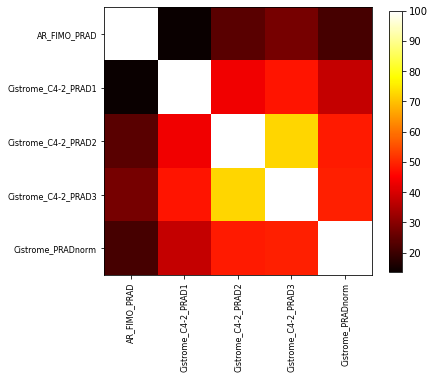

In [66]:
fig, ax = plt.subplots(figsize=(6, 6))

heatmap = ax.imshow(percentages_PRAD_FIMOandCis, cmap='hot', interpolation='nearest')
x_labels = ['AR_FIMO_PRAD', 'Cistrome_C4-2_PRAD1', 'Cistrome_C4-2_PRAD2', 'Cistrome_C4-2_PRAD3', 'Cistrome_PRADnorm']
y_labels = ['AR_FIMO_PRAD', 'Cistrome_C4-2_PRAD1', 'Cistrome_C4-2_PRAD2', 'Cistrome_C4-2_PRAD3', 'Cistrome_PRADnorm']

ax.set_xticks(range(len(x_labels)))
ax.set_yticks(range(len(y_labels)))
ax.set_xticklabels(x_labels, rotation=90, fontsize=8)
ax.set_yticklabels(y_labels, fontsize=8)

#plt.title('Heatmap of percentages overlap of our PRAD AR motif search data and the CHIP-seq data of different PRAD from Cistrome')

cbar = plt.colorbar(heatmap, ax=ax, shrink=0.8)

plt.show()

### Negative control

In [59]:
#Based on protein and RNA expression in melanoma skin from the ProteinAtlas we choose this as a negative control 
#(The expression should be very low)

#Comparing a melanoma skin datasets (quality control of 4) from Cistrome with our dataset from FIMO
df_AR, df_Cistrome, avg_perc_SKCM = percentage(sets_AR[17], sets_Cistrome[6], 'AR_SKCM', 'Cistrome_SKCM');

print(avg_perc_SKCM) #Result is approximately 2,8% overlap

percentage overlap of AR_SKCM on Cistrome_SKCM : 1.4437689969604863 percentage overlap of  Cistrome_SKCM on AR_SKCM : 4.110738255033557
2.7772536259970217


In [60]:
#Comparing a colon datasets (quality control of 5) from Cistrome with our dataset from FIMO
df_AR, df_Cistrome, avg_perc_COAD = percentage(sets_AR[4], sets_Cistrome[5], 'AR_COAD', 'Cistrome_COAD');

print(avg_perc_COAD) #Result is approximately 0% overlap

percentage overlap of AR_COAD on Cistrome_COAD : 0.0 percentage overlap of  Cistrome_COAD on AR_COAD : 0.0
0.0


### Some other tumor types

#### These tumor types are inbetween positive and negative control in terms of expected AR expression based on ProteinAtlas

In [68]:
#Comparing two breast datasets (both quality control of 5) from Cistrome with our dataset from FIMO
df_AR1, df_Cistrome1, avg_perc_BRCA1 = percentage(sets_AR[1], sets_Cistrome[0], 'Cistrome_BRCA1', 'AR_BRCA1')
df_AR2, df_Cistrome2, avg_perc_BRCA2 = percentage(sets_AR[1], sets_Cistrome[1],'Cistrome_BRCA2', 'AR_BRCA2')
df_AR2, df_Cistrome2, avg_perc_BRCA3 = percentage(sets_AR[1], sets_Cistrome[9],'Cistrome_BRCA3', 'AR_BRCA3') #MCF-7 breast data

print(avg_perc_BRCA1) #Result is approximately 4,6% overlap
print(avg_perc_BRCA2) #Result is approximately 4,1% overlap
print(avg_perc_BRCA3) #Result is approximately 5,8% overlap

avg_BRCA = (avg_perc_BRCA1+avg_perc_BRCA2+avg_perc_BRCA3)/3
avg_BRCA

percentage overlap of Cistrome_BRCA1 on AR_BRCA1 : 5.657599551318004 percentage overlap of  AR_BRCA1 on Cistrome_BRCA1 : 3.6156529502207087
percentage overlap of Cistrome_BRCA2 on AR_BRCA2 : 4.51719947653767 percentage overlap of  AR_BRCA2 on Cistrome_BRCA2 : 3.7459422518366647
percentage overlap of Cistrome_BRCA3 on AR_BRCA3 : 0.6216115161712469 percentage overlap of  AR_BRCA3 on Cistrome_BRCA3 : 11.074766355140186
4.636626250769356
4.131570864187168
5.848188935655717


4.872128683537414

In [69]:
#Comparing a kidney datasets (quality control of 5) from Cistrome with our dataset from FIMO
df_AR, df_Cistrome, avg_perc_KIRC = percentage(sets_AR[8], sets_Cistrome[7], 'AR_KIRC', 'Cistrome_KIRC');
df_AR, df_Cistrome, avg_perc_KIRP = percentage(sets_AR[9], sets_Cistrome[7], 'AR_KIRP', 'Cistrome_KIRP');

print(avg_perc_KIRC) #Result is approximately 0.05% overlap
print(avg_perc_KIRP) #Result is approximately 0.12% overlap

avg_KIRC_KIRP = (avg_perc_KIRC+avg_perc_KIRP)/2
avg_KIRC_KIRP 

percentage overlap of AR_KIRC on Cistrome_KIRC : 0.026062027625749284 percentage overlap of  Cistrome_KIRC on AR_KIRC : 0.0691085003455425
percentage overlap of AR_KIRP on Cistrome_KIRP : 0.056001493373156616 percentage overlap of  Cistrome_KIRP on AR_KIRP : 0.193503800967519
0.047585263985645894
0.12475264717033782


0.08616895557799185